# Final Capstone Project: Bogota Foodie Tour


## Backgroud
Bogota has dramatically increased its gastronomical offer. Dozens of restaurants are opened every day, and hot zones are wider each month, with alternative offerings being opened in completely new places, far away from traditional restarant zones.

## Indroduction and business reason

This project intends to cluster neighborhoods in Bogota depending on their restaurants' offering so that Foodies can easily define a Tour route based on their preferences. Two deliverables will be presented at the end of the project:

1. Descriptive statistics from Bogotá venues, including the amount of restaurants per category, and a map showing their geographical distribution
2. Clustering of the neighborhoods based on offer density and restaurant categories. Following deliverables will be presented: 
    a. A description of each cluster 
    b. A table with the clasification of each neighborhood in Bogota, identifing the cluster it belongs to, amount of restaurants in the area, and distribution of restaurants per category
    c. A map to represent neighborhood clusters in a graphical matter

This project will allow the users to have an accurate map of the restaurant offer in Bogota and. This can be an input for the commercial zones to increase their visibility for Foodie tourism or for the tourism industry to better structure gastronomic tourism offerings.



## Data 

### Data Source for Bogota Neighborhood Location

Bogota's Urban Laboratory Institute ("Laboratorio Urbano de Bogota") has a very complete database that includes the name, location and description of each neighborhood in Bogota. This will be the main source of external data for the project. Raw data can be downloaded from the following link: https://bogota-laburbano.opendatasoft.com/explore/dataset/barrios_prueba/download?format=xls

### Data Uploading and Data Cleaning for Bogota Data

In order to be able to interact with the data in my jupyter notebook, I will upload the file to the project storage using the "File and Add data" funciontality from the Notebook application. 

Once updloaded I will have to clean the data: 
1. I will drop several lines that doesn't have a Borough identified ("Localidad"), that are not a legal neighborhood, or that don't have a name
2. The original table has the following columns: "OBJECTID	Codigo Localidad	Localidad	Estado	Nombre	Codigo	SHAPE.AREA	SHAPE.LEN	geo_shape	geo_point_2d" I will only use the columns "OBJECTID	Localidad Nombre geo_point_2d". Column geo_point_2d includes both Latitude Longitude and has to be splitted.
3. I will re-name the columns as follows: "Neighborhood_ID	Borough Neighborhood Latitude Longitude" 

<b>For Example</b>: Neighborhood "Usaquén" is one of the most important ones for the restaurant industry in Bogota. This neighborhood will definetely have to be included in the data set, final values for the mentioned columns shall be:

1. <b>Neighborhood_ID</b>: 657
2. <b>Borough</b>: Usaquén
3. <b>Name</b>: Usaquén
4. <b>Latitude</b>: 4.69474025606
5. <b>Borough</b>: -74.030740809

Neighborhood "Ciudadela El Poblado" in line 3000 from the original table on the contrary is not a legal neighborhood and doesn't specify a Borough, it will be dropped accordingly

The following code shows the steps to manage the data and the final result from the table


In [2]:
# Import Libraries
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3
import numpy as np # library to handle data in a vectorized manner
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

In [3]:
# The code was removed by Watson Studio for sharing.

In [4]:
body = client_05f8314fda894ba0b966bc0d65084f49.get_object(Bucket='capstonew45finalprojectbogotafood-donotdelete-pr-opjjibxwizmams',Key='barrios_bogota_3.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_bog_neigh = pd.read_excel(body)
df_bog_neigh.head()

OBJECTID  Codigo Localidad       Localidad         Estado  \
0      1430                19  Ciudad Bolívar     LEGALIZADO   
1      1431                19  Ciudad Bolívar     LEGALIZADO   
2      1434                19  Ciudad Bolívar     LEGALIZADO   
3      1437                19  Ciudad Bolívar     LEGALIZADO   
4      1440                19  Ciudad Bolívar  SIN LEGALIZAR   

                              Nombre  Codigo    SHAPE.AREA  SHAPE.LEN  \
0               Jerusalén La Pradera  190083  2.199423e-05   0.022444   
1                        Gibraltar I  190076  7.350520e-07   0.003827   
2           San Francisco La Palmera  190212  7.373517e-07   0.005711   
3                 La Florida del Sur  190100  1.187800e-06   0.006444   
4  Urb. Villa del Rio Zona Comercial  190285  1.229367e-05   0.016802   

                                           geo_shape  \
0  {"type": "Polygon", "coordinates": [[[-74.1599...   
1  {"type": "Polygon", "coordinates": [[[-74.1409...   
2  {"type": "Polygon", "coordinates": [[[-74.1438...   
3  {"type": "Polygon", "coordinates": [[[-74.1388...   
4  {"type": "Polygon", "coordinates": [[[-74.1550...   

                    geo_point_2d  
0  4.57170783064, -74.1623352778  
1  4.55942859701, -74.1412673602  
2   4.56057102018, -74.143503033  
3  4.54954369286, -74.1388429955  
4   4.59753400889, -74.152870721

In [5]:
# Check shape
df_bog_neigh.shape

(3871, 10)

In [6]:
# Drop neighborhoods without Borough
df_bog_neigh['Localidad'].replace('', np.nan, inplace=True)
df_bog_neigh.dropna(subset=['Localidad'], inplace=True)
df_bog_neigh.shape

(3792, 10)

In [7]:
# Drop Columns
df_bog_neigh.drop(['Codigo Localidad', 'Estado', 'Codigo', 'SHAPE.AREA', 'SHAPE.LEN', 'geo_shape'], axis=1, inplace=True)
df_bog_neigh.head()

OBJECTID       Localidad                             Nombre  \
0      1430  Ciudad Bolívar               Jerusalén La Pradera   
1      1431  Ciudad Bolívar                        Gibraltar I   
2      1434  Ciudad Bolívar           San Francisco La Palmera   
3      1437  Ciudad Bolívar                 La Florida del Sur   
4      1440  Ciudad Bolívar  Urb. Villa del Rio Zona Comercial   

                    geo_point_2d  
0  4.57170783064, -74.1623352778  
1  4.55942859701, -74.1412673602  
2   4.56057102018, -74.143503033  
3  4.54954369286, -74.1388429955  
4   4.59753400889, -74.152870721

In [8]:
# Split coordinates in two columns and rename
coord = df_bog_neigh["geo_point_2d"].str.split(", ", n = 1, expand = True)
df_bog_neigh["Latitude"]=coord[0]
df_bog_neigh["Longitude"]=coord[1]
df_bog_neigh.drop(['geo_point_2d'], axis=1, inplace=True)
df_bog_neigh.rename(columns={'OBJECTID': 'Neighborhood_ID', 'Localidad': 'Borough', 'Nombre': 'Neighborhood'}, inplace=True)
df_bog_neigh.dropna(subset=['Latitude'], inplace=True)
df_bog_neigh.dropna(subset=['Longitude'], inplace=True)
df_bog_neigh.sort_values(by=['Neighborhood_ID'], inplace=True)
df_bog_neigh.reset_index(drop=True, inplace=True)
df_bog_neigh.head()

Neighborhood_ID  Borough                    Neighborhood       Latitude  \
0                1  Usaquén            Arboleda del Country  4.70897068371   
1                2  Usaquén  Páramo - Escuela de Caballería   4.6790899793   
2                3     Suba                    Calima Norte  4.74998433536   
3                4  Usaquén             San José de Usaquén  4.75265544583   
4                5  Usaquén                 Urb. El Campito  4.71166471605   

        Longitude  
0    -74.03337115  
1  -74.0261263668  
2  -74.0641840704  
3   -74.034244731  
4  -74.0321365657

In [9]:
df_bog_neigh.shape

(3790, 5)

## Methodology

I have followed the following steps to analyze the data and organize it in a way that allows statistical methods to reach meaninful results.

### 1. Create Bogota Map and Add Neighborhood Markers

The map provided me density information as well as information on the distribution of neighborhood per Borough. I was able to identify that even after data cleanup, there is a significant amount of neighborhoods in Bogota, and predict that once the 


### 2. Foursquare query

After Bogota neighborhoods' source information was clean and the data was in the proper format, I performed a search in Foursquare for restaurant venues in each of the restaurants. The output of the query was cleaned and grouped in order to provide meainingfull results:

1. The amount of categories obtained from the Foursquare query is extensive, and as a result it will be harder to interpretate and cluster results

<b>For Example</b>: When I query Usapen, it will probably show a wide number of categories for different Asian restaurants, including probably: Asian, Filipino, Chineese. I will group them as Asian. 

The final categories were defined based on an exploratory analysis and frequency count from the original categories provided by Foursquare. I went from 89 categories originally provided by Foursquare to only 9:
1. American/Fast Food Restaurant
2. Asian/Japanese Restaurant
3. Bar/Winery, Cafe/Bakery
4. Diner/General Restaurant
5. International/European Restaurant
6. Italian/Pizza Restaurant
7. Latin American/Colombian Restaurant
8. Seafood/Fish Restaurant


2. The information was consolidated and merged with the original dataframe


### 3. Exploratory analysis on Bogota restaurant data

#### Graphical Representation from the Neighborhoods' Restaurant Offer in Bogota

In order to analyze the results, I have created two graphs:

1. A map with the neighborhoods that have restaurants according to Foursquare search query, and 
2. A bar chart with the amount of restaurants per category and per Borough in the entire city.


### Clustering

Once the final dataframe is properly set, clustering will be performed. Neighborhoods were clustered using the amount of restaurants per grouped category, and the total amount of restaurants as clustering variables. Total amount of restaurants is included in the analysis in order to provide a sense of offer density.

The first analysis using 5 clusters resulted in one cluster including only one neighborhood, therefore I dediced to run a second analysis with 4 clusers, resulting in very interesting 

### Analysis and presentation

The final sections of this notebook include 


In [10]:
# Define Bogota Location
address = 'Bogota, Colombia'
geolocator = Nominatim(user_agent="bogota_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bogota are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Bogota are 4.59808, -74.0760439.


In [11]:
# Convert coordinates to float
df_bog_neigh['Latitude'] = df_bog_neigh['Latitude'].astype(float)
df_bog_neigh['Longitude'] = df_bog_neigh['Longitude'].astype(float)
df_bog_neigh.head()

Neighborhood_ID  Borough                    Neighborhood  Latitude  \
0                1  Usaquén            Arboleda del Country  4.708971   
1                2  Usaquén  Páramo - Escuela de Caballería  4.679090   
2                3     Suba                    Calima Norte  4.749984   
3                4  Usaquén             San José de Usaquén  4.752655   
4                5  Usaquén                 Urb. El Campito  4.711665   

   Longitude  
0 -74.033371  
1 -74.026126  
2 -74.064184  
3 -74.034245  
4 -74.032137

In [12]:
#Split in north and south to ease visualization
df_bog_neigh_north=df_bog_neigh[df_bog_neigh.Latitude > 4.633889]
df_bog_neigh_south=df_bog_neigh[df_bog_neigh.Latitude < 4.633889]
# Create a map of bogota norht and south
latitude_n=4.69
latitude_s=4.55
map_bogota_north = folium.Map(location=[latitude_n, longitude], zoom_start=12)
map_bogota_south = folium.Map(location=[latitude_s, longitude], zoom_start=12)

In [13]:
# add markers to map
for lat, lng in zip(df_bog_neigh_north['Latitude'], df_bog_neigh_north['Longitude']):
    #label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        #popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bogota_north)
map_bogota_north

In [14]:
# add markers to map
for lat, lng in zip(df_bog_neigh_south['Latitude'], df_bog_neigh_south['Longitude']):
    #label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        #popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bogota_south)
map_bogota_south

### Foursquare Queries

In [15]:
# The code was removed by Watson Studio for sharing.

In [16]:
def getNearbyRestaurants(neighborhood_ids, latitudes, longitudes, radius=300, LIMIT=300, search_query='Restaurant'):
    #columns=['Neighborhood','name', 'categories', 'location.lat', 'location.lng', 'id']
    columns=['name', 'categories', 'location.lat', 'location.lng', 'id']
    venues_list=pd.DataFrame(columns=columns)
    for neighborhood_id, lat, lng in zip (neighborhood_ids, latitudes, longitudes):
        print(neighborhood_id)
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            lat, 
            lng, 
            VERSION,
            search_query,
            radius, 
            LIMIT)
         # make the GET request
        results = requests.get(url).json()["response"]['venues']
        df_results=json_normalize(results)
        try:
            df_results = df_results.loc[:, ['name', 'categories', 'location.lat', 'location.lng', 'id']]
        except:
            None
        df_results.insert(0,'Neighborhood_ID', neighborhood_id ,True)
        venues_list=venues_list.append(df_results)
        
    return(venues_list)

In [18]:
#df_bog_neigh1=df_bog_neigh.head(100)
bogota_restaurants = getNearbyRestaurants(neighborhood_ids=df_bog_neigh['Neighborhood_ID'],
                                   latitudes=df_bog_neigh['Latitude'],
                                   longitudes=df_bog_neigh['Longitude']
                                  )

# Check shape and head structure
print(bogota_restaurants.shape)
bogota_restaurants.Neighborhood_ID = bogota_restaurants.Neighborhood_ID.astype(int)
bogota_restaurants.head()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278


Neighborhood_ID                                         categories  \
0                3  [{'id': '4bf58dd8d48988d1df931735', 'name': 'B...   
1                3  [{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...   
2                3  [{'id': '4bf58dd8d48988d1df931735', 'name': 'B...   
3                3  [{'id': '4bf58dd8d48988d1be941735', 'name': 'L...   
4                3  [{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...   

                         id  location.lat  location.lng  \
0  51f42eb0498e3a45a772556f      4.748946    -74.064064   
1  4fc7ab83e4b0f136af53dd3c      4.749503    -74.065396   
2  50cb676fe4b0b0b9756bb5b9      4.750103    -74.062075   
3  52e2a471498e3ac898283a95      4.748919    -74.064633   
4  50648c11e4b08e625b73c9d1      4.749275    -74.066968   

                               name  
0             Restaurante El Guavio  
1  Restaurante Estrellita Del Norte  
2         Restaurante Casa Emiliani  
3              Materile Restaurante  
4      Villa de Leyva - Restaurante

In [19]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [20]:
# filter the category for each row
bogota_restaurants['categories'] = bogota_restaurants.apply(get_category_type, axis=1)

In [21]:
bogota_restaurants.head()

Neighborhood_ID                 categories                        id  \
0                3                  BBQ Joint  51f42eb0498e3a45a772556f   
1                3                 Restaurant  4fc7ab83e4b0f136af53dd3c   
2                3                  BBQ Joint  50cb676fe4b0b0b9756bb5b9   
3                3  Latin American Restaurant  52e2a471498e3ac898283a95   
4                3                 Restaurant  50648c11e4b08e625b73c9d1   

   location.lat  location.lng                              name  
0      4.748946    -74.064064             Restaurante El Guavio  
1      4.749503    -74.065396  Restaurante Estrellita Del Norte  
2      4.750103    -74.062075         Restaurante Casa Emiliani  
3      4.748919    -74.064633              Materile Restaurante  
4      4.749275    -74.066968      Villa de Leyva - Restaurante

In [22]:
# Groupby Neighborhood_ID
bogota_restaurants.groupby('Neighborhood_ID').count()
# one hot encoding (one category per column)
bogota_restaurants_onehot = pd.get_dummies(bogota_restaurants[['categories']], prefix="", prefix_sep="")
# add Neighborhood column back to dataframe
bogota_restaurants_onehot['Neighborhood_ID'] = bogota_restaurants['Neighborhood_ID'] 
# move Neighborhood_ID column to the first column
fixed_columns = [bogota_restaurants_onehot.columns[-1]] + list(bogota_restaurants_onehot.columns[:-1])
bogota_restaurants_onehot = bogota_restaurants_onehot[fixed_columns]
bogota_restaurants_grouped = bogota_restaurants_onehot.groupby('Neighborhood_ID').sum().reset_index()
bogota_restaurants_grouped.head()

Neighborhood_ID  American Restaurant  Antique Shop  Arepa Restaurant  \
0                3                    0             0                 0   
1                5                    0             0                 0   
2                6                    0             0                 0   
3                7                    0             0                 0   
4               10                    0             0                 0   

   Argentinian Restaurant  Asian Restaurant  BBQ Joint  Bakery  Bar  Beer Bar  \
0                       0                 0          2       0    0         0   
1                       0                 0          1       0    0         0   
2                       0                 0          0       0    0         0   
3                       0                 0          0       0    0         0   
4                       0                 0          0       0    0         0   

   Bistro  Breakfast Spot  Buffet  Burger Joint  Cafeteria  Café  \
0       0               0       0             0          0     0   
1       0               0       0             0          0     0   
2       0               0       0             0          0     0   
3       0               0       0             0          0     0   
4       0               0       0             0          0     0   

   Cajun / Creole Restaurant  Cantonese Restaurant  Caribbean Restaurant  \
0                          0                     0                     0   
1                          0                     0                     0   
2                          0                     0                     0   
3                          0                     0                     0   
4                          0                     0                     0   

   Casino  Chinese Restaurant  Cocktail Bar  Coffee Shop  \
0       0                   0             0            0   
1       0                   0             0            0   
2       0                   0             0            0   
3       0                   1             0            0   
4       0                   0             0            0   

   Colombian Restaurant  Comfort Food Restaurant  Creperie  Cuban Restaurant  \
0                     0                        0         0                 0   
1                     0                        0         0                 0   
2                     0                        0         0                 0   
3                     0                        0         0                 0   
4                     0                        0         0                 0   

   Cupcake Shop  Department Store  Dim Sum Restaurant  Diner  \
0             0                 0                   0      0   
1             0                 0                   0      0   
2             0                 0                   0      0   
3             0                 0                   0      0   
4             0                 0                   0      0   

   Dumpling Restaurant  Eastern European Restaurant  Empanada Restaurant  \
0                    0                            0                    0   
1                    0                            0                    0   
2                    0                            0                    0   
3                    0                            0                    0   
4                    0                            0                    0   

   Event Service  Falafel Restaurant  Fast Food Restaurant  Fish & Chips Shop  \
0              0                   0                     0                  0   
1              0                   0                     0                  0   
2              0                   0                     0                  0   
3              0                   0                     0                  0   
4              0                   0                     0                  0   

   Food  Food Court  Food Tr

### Analisis of Bogota Statistics

In [23]:
# Group restaurants by Borough
# Add Borough to the lines
bogota_restaurants_merged = df_bog_neigh
bogota_restaurants_merged = bogota_restaurants_merged.join(bogota_restaurants_grouped.set_index('Neighborhood_ID'), on='Neighborhood_ID')
bogota_restaurants_merged.head()

Neighborhood_ID  Borough                    Neighborhood  Latitude  \
0                1  Usaquén            Arboleda del Country  4.708971   
1                2  Usaquén  Páramo - Escuela de Caballería  4.679090   
2                3     Suba                    Calima Norte  4.749984   
3                4  Usaquén             San José de Usaquén  4.752655   
4                5  Usaquén                 Urb. El Campito  4.711665   

   Longitude  American Restaurant  Antique Shop  Arepa Restaurant  \
0 -74.033371                  NaN           NaN               NaN   
1 -74.026126                  NaN           NaN               NaN   
2 -74.064184                  0.0           0.0               0.0   
3 -74.034245                  NaN           NaN               NaN   
4 -74.032137                  0.0           0.0               0.0   

   Argentinian Restaurant  Asian Restaurant  BBQ Joint  Bakery  Bar  Beer Bar  \
0                     NaN               NaN        NaN     NaN  NaN       NaN   
1                     NaN               NaN        NaN     NaN  NaN       NaN   
2                     0.0               0.0        2.0     0.0  0.0       0.0   
3                     NaN               NaN        NaN     NaN  NaN       NaN   
4                     0.0               0.0        1.0     0.0  0.0       0.0   

   Bistro  Breakfast Spot  Buffet  Burger Joint  Cafeteria  Café  \
0     NaN             NaN     NaN           NaN        NaN   NaN   
1     NaN             NaN     NaN           NaN        NaN   NaN   
2     0.0             0.0     0.0           0.0        0.0   0.0   
3     NaN             NaN     NaN           NaN        NaN   NaN   
4     0.0             0.0     0.0           0.0        0.0   0.0   

   Cajun / Creole Restaurant  Cantonese Restaurant  Caribbean Restaurant  \
0                        NaN                   NaN                   NaN   
1                        NaN                   NaN                   NaN   
2                        0.0                   0.0                   0.0   
3                        NaN                   NaN                   NaN   
4                        0.0                   0.0                   0.0   

   Casino  Chinese Restaurant  Cocktail Bar  Coffee Shop  \
0     NaN                 NaN           NaN          NaN   
1     NaN                 NaN           NaN          NaN   
2     0.0                 0.0           0.0          0.0   
3     NaN                 NaN           NaN          NaN   
4     0.0                 0.0           0.0          0.0   

   Colombian Restaurant  Comfort Food Restaurant  Creperie  Cuban Restaurant  \
0                   NaN                      NaN       NaN               NaN   
1                   NaN                      NaN       NaN               NaN   
2                   0.0                      0.0       0.0               0.0   
3                   NaN                      NaN       NaN               NaN   
4                   0.0                      0.0       0.0               0.0   

   Cupcake Shop  Department Store  Dim Sum Restaurant  Diner  \
0           NaN               NaN                 NaN    NaN   
1           NaN               NaN                 NaN    NaN   
2           0.0               0.0                 0.0    0.0   
3           NaN               NaN                 NaN    NaN   
4           0.0               0.0                 0.0    0.0   

   Dumpling Restaurant  Eastern European Restaurant  Empanada Restaurant  \
0                  NaN                          NaN                  NaN   
1                  NaN                          NaN                  NaN   
2                  0.0                          0.0                  0.0   
3                  NaN                          NaN                  NaN   
4                  0.0                          0.0                  0.0   

   Event Service  Falafel Restaurant  Fast Food Restaurant  Fish & Chips Shop  \
0            NaN               

In [24]:
# Drop Neighborhoods without Restaurants
bogota_restaurants_merged.dropna(subset=['American Restaurant'], inplace = True)
bogota_restaurants_merged.head(10)

Neighborhood_ID        Borough           Neighborhood  Latitude  \
2                 3           Suba           Calima Norte  4.749984   
4                 5        Usaquén        Urb. El Campito  4.711665   
5                 6      Chapinero  Pinar Alto - Pinar II  4.661800   
6                 7       Fontibón                 Laredo  4.681361   
9                10        Usaquén  S.C. Horizontes Norte  4.756549   
11               12      Chapinero       S.C. Espartillal  4.664158   
14               15    Teusaquillo             Cama Vieja  4.634517   
18               19  Puente Aranda            Pensilvania  4.612538   
19               20       Fontibón        Urb. Costabelda  4.676378   
20               21       Fontibón        Torres del Rubí  4.675730   

    Longitude  American Restaurant  Antique Shop  Arepa Restaurant  \
2  -74.064184                  0.0           0.0               0.0   
4  -74.032137                  0.0           0.0               0.0   
5  -74.047865                  0.0           0.0               0.0   
6  -74.147468                  0.0           0.0               0.0   
9  -74.023357                  0.0           0.0               0.0   
11 -74.055778                  0.0           0.0               0.0   
14 -74.095325                  0.0           0.0               0.0   
18 -74.097547                  0.0           0.0               0.0   
19 -74.134343                  0.0           0.0               0.0   
20 -74.133805                  0.0           0.0               0.0   

    Argentinian Restaurant  Asian Restaurant  BBQ Joint  Bakery  Bar  \
2                      0.0               0.0        2.0     0.0  0.0   
4                      0.0               0.0        1.0     0.0  0.0   
5                      0.0               0.0        0.0     0.0  0.0   
6                      0.0               0.0        0.0     0.0  0.0   
9                      0.0               0.0        0.0     0.0  0.0   
11                     0.0               0.0        0.0     1.0  0.0   
14                     0.0               0.0        1.0     0.0  0.0   
18                     0.0               0.0        1.0     0.0  0.0   
19                     0.0               0.0        0.0     0.0  0.0   
20                     0.0               0.0        0.0     0.0  0.0   

    Beer Bar  Bistro  Breakfast Spot  Buffet  Burger Joint  Cafeteria  Café  \
2        0.0     0.0             0.0     0.0           0.0        0.0   0.0   
4        0.0     0.0             0.0     0.0           0.0        0.0   0.0   
5        0.0     0.0             0.0     0.0           0.0        0.0   0.0   
6        0.0     0.0             0.0     0.0           0.0        0.0   0.0   
9        0.0     0.0             0.0     0.0           0.0        0.0   0.0   
11       0.0     1.0             0.0     0.0           0.0        0.0   0.0   
14       0.0     1.0             0.0     0.0           0.0        0.0   0.0   
18       0.0     0.0             0.0     0.0           0.0        0.0   0.0   
19       0.0     0.0             0.0     0.0           0.0        0.0   0.0   
20       0.0     0.0             0.0     0.0           0.0        0.0   0.0   

    Cajun / Creole Restaurant  Cantonese Restaurant  Caribbean Restaurant  \
2                         0.0                   0.0                   0.0   
4                         0.0                   0.0                   0.0   
5                         0.0                   0.0                   0.0   
6                         0.0                   0.0                   0.0   
9                         0.0                   0.0                   0.0   
11                        1.0                   0.0                   0.0   
14                        0.0                   0.0                   0.0   
18                        0.0                   0.0                   0.0   
19                        0.0                   0.0                   0.0   
20                

In [25]:
# Check how many neighborhoods have restaurants
bogota_restaurants_merged.shape

(1210, 94)

In [26]:
#Drop non-restaurant categories
bogota_restaurants_merged.drop(columns=['Antique Shop', 'Casino', 'Department Store', 'Event Service', 'Grocery Store', 'Historic Site', 'Hotel', 'Nightclub', 'Residential Building (Apartment / Condo)', 'Travel Lounge'], inplace=True)

# Total Column
columns_sum=list(bogota_restaurants_merged)
columns_sum.remove('Neighborhood_ID')
columns_sum.remove('Borough')
columns_sum.remove('Neighborhood')
columns_sum.remove('Latitude')
columns_sum.remove('Longitude')
bogota_restaurants_merged['Total Restaurants']=bogota_restaurants_merged[columns_sum].sum(axis=1)

#drop neighborhoods with no restaurants
bogota_restaurants_merged=bogota_restaurants_merged[bogota_restaurants_merged['Total Restaurants'] > 0]

bogota_restaurants_merged.tail()

Neighborhood_ID         Borough                 Neighborhood  Latitude  \
3777             3859  Antonio Nariño  San Jorge Central II Sector  4.593203   
3778             3860  Antonio Nariño            San Jorge_Central  4.594250   
3780             3862        Fontibón          La Cabaña - El Rubí  4.676078   
3782             3864         Usaquén            Cabañas del Norte  4.735840   
3783             3865            Suba         Prados de la Campiña  4.741881   

      Longitude  American Restaurant  Arepa Restaurant  \
3777 -74.116692                  0.0               0.0   
3778 -74.114650                  0.0               0.0   
3780 -74.138760                  0.0               0.0   
3782 -74.030747                  0.0               0.0   
3783 -74.088741                  0.0               0.0   

      Argentinian Restaurant  Asian Restaurant  BBQ Joint  Bakery  Bar  \
3777                     0.0               0.0        0.0     0.0  0.0   
3778                     0.0               0.0        0.0     0.0  0.0   
3780                     0.0               0.0        0.0     0.0  0.0   
3782                     1.0               0.0        0.0     0.0  0.0   
3783                     0.0               0.0        1.0     0.0  0.0   

      Beer Bar  Bistro  Breakfast Spot  Buffet  Burger Joint  Cafeteria  Café  \
3777       0.0     0.0             0.0     0.0           0.0        0.0   0.0   
3778       0.0     0.0             0.0     0.0           0.0        0.0   0.0   
3780       0.0     0.0             0.0     0.0           0.0        0.0   0.0   
3782       0.0     0.0             0.0     0.0           0.0        0.0   0.0   
3783       0.0     0.0             0.0     0.0           0.0        0.0   0.0   

      Cajun / Creole Restaurant  Cantonese Restaurant  Caribbean Restaurant  \
3777                        0.0                   0.0                   0.0   
3778                        0.0                   0.0                   0.0   
3780                        0.0                   0.0                   0.0   
3782                        0.0                   0.0                   0.0   
3783                        0.0                   0.0                   0.0   

      Chinese Restaurant  Cocktail Bar  Coffee Shop  Colombian Restaurant  \
3777                 0.0           0.0          0.0                   0.0   
3778                 0.0           0.0          0.0                   0.0   
3780                 0.0           0.0          0.0                   0.0   
3782                 0.0           0.0          0.0                   0.0   
3783                 0.0           0.0          0.0                   0.0   

      Comfort Food Restaurant  Creperie  Cuban Restaurant  Cupcake Shop  \
3777                      0.0       0.0               0.0           0.0   
3778                      0.0       0.0               0.0           0.0   
3780                      0.0       0.0               0.0           0.0   
3782                      0.0       0.0               0.0           0.0   
3783                      0.0       0.0               0.0           0.0   

      Dim Sum Restaurant  Diner  Dumpling Restaurant  \
3777                 0.0    0.0                  0.0   
3778                 0.0    0.0                  0.0   
3780                 0.0    0.0                  0.0   
3782                 0.0    0.0                  0.0   
3783                 0.0    0.0                  0.0   

      Eastern European Restaurant  Empanada Restaurant  Falafel Restaurant  \
3777                          0.0                  0.0                 0.0   
3778                          0.0                  0.0                 0.0   
3780                          0.0                  0.0                 0.0   
3782                          0.0                  0.0                 0.0   
3783                          0.0                  0.0                 0.0   

      Fast Food Restaurant  Fish & Chips Shop  Fo

In [27]:
# Add Total Row
bogota_restaurants_merged=bogota_restaurants_merged.append(bogota_restaurants_merged.sum(numeric_only=True), ignore_index=True)
bogota_restaurants_merged.tail()

Neighborhood_ID         Borough          Neighborhood     Latitude  \
1167           3860.0  Antonio Nariño     San Jorge_Central     4.594250   
1168           3862.0        Fontibón   La Cabaña - El Rubí     4.676078   
1169           3864.0         Usaquén     Cabañas del Norte     4.735840   
1170           3865.0            Suba  Prados de la Campiña     4.741881   
1171        2393924.0             NaN                   NaN  5472.472207   

         Longitude  American Restaurant  Arepa Restaurant  \
1167    -74.114650                  0.0               0.0   
1168    -74.138760                  0.0               0.0   
1169    -74.030747                  0.0               0.0   
1170    -74.088741                  0.0               0.0   
1171 -86765.064720                 34.0              26.0   

      Argentinian Restaurant  Asian Restaurant  BBQ Joint  Bakery   Bar  \
1167                     0.0               0.0        0.0     0.0   0.0   
1168                     0.0               0.0        0.0     0.0   0.0   
1169                     1.0               0.0        0.0     0.0   0.0   
1170                     0.0               0.0        1.0     0.0   0.0   
1171                    25.0              69.0      286.0     9.0  25.0   

      Beer Bar  Bistro  Breakfast Spot  Buffet  Burger Joint  Cafeteria  Café  \
1167       0.0     0.0             0.0     0.0           0.0        0.0   0.0   
1168       0.0     0.0             0.0     0.0           0.0        0.0   0.0   
1169       0.0     0.0             0.0     0.0           0.0        0.0   0.0   
1170       0.0     0.0             0.0     0.0           0.0        0.0   0.0   
1171       2.0    14.0            52.0    29.0          13.0        3.0  16.0   

      Cajun / Creole Restaurant  Cantonese Restaurant  Caribbean Restaurant  \
1167                        0.0                   0.0                   0.0   
1168                        0.0                   0.0                   0.0   
1169                        0.0                   0.0                   0.0   
1170                        0.0                   0.0                   0.0   
1171                      104.0                   8.0                  59.0   

      Chinese Restaurant  Cocktail Bar  Coffee Shop  Colombian Restaurant  \
1167                 0.0           0.0          0.0                   0.0   
1168                 0.0           0.0          0.0                   0.0   
1169                 0.0           0.0          0.0                   0.0   
1170                 0.0           0.0          0.0                   0.0   
1171               160.0           7.0         11.0                  10.0   

      Comfort Food Restaurant  Creperie  Cuban Restaurant  Cupcake Shop  \
1167                      0.0       0.0               0.0           0.0   
1168                      0.0       0.0               0.0           0.0   
1169                      0.0       0.0               0.0           0.0   
1170                      0.0       0.0               0.0           0.0   
1171                     54.0       4.0               2.0           1.0   

      Dim Sum Restaurant  Diner  Dumpling Restaurant  \
1167                 0.0    0.0                  0.0   
1168                 0.0    0.0                  0.0   
1169                 0.0    0.0                  0.0   
1170                 0.0    0.0                  0.0   
1171                 7.0   56.0                  2.0   

      Eastern European Restaurant  Empanada Restaurant  Falafel Restaurant  \
1167                          0.0                  0.0                 0.0   
1168                          0.0                  0.0                 0.0   
1169                          0.0                  0.0                 0.0   
1170                          0.0                  0.0                 0.0   
1171                          4.0                  4.0                 1.0   

      Fast Food Restaurant  Fish & Chips Shop  Fo

In [28]:
# Correct Total row labels
bogota_restaurants_merged.Neighborhood_ID = bogota_restaurants_merged.Neighborhood_ID.astype(int)
bogota_restaurants_merged.loc[[1171], ['Neighborhood_ID']] = 4000
bogota_restaurants_merged.loc[[1171], ['Borough', 'Neighborhood', 'Latitude', 'Longitude']] = "Total"
bogota_restaurants_merged.tail()

Neighborhood_ID         Borough          Neighborhood Latitude  \
1167             3860  Antonio Nariño     San Jorge_Central  4.59425   
1168             3862        Fontibón   La Cabaña - El Rubí  4.67608   
1169             3864         Usaquén     Cabañas del Norte  4.73584   
1170             3865            Suba  Prados de la Campiña  4.74188   
1171             4000           Total                 Total    Total   

     Longitude  American Restaurant  Arepa Restaurant  Argentinian Restaurant  \
1167  -74.1146                  0.0               0.0                     0.0   
1168  -74.1388                  0.0               0.0                     0.0   
1169  -74.0307                  0.0               0.0                     1.0   
1170  -74.0887                  0.0               0.0                     0.0   
1171     Total                 34.0              26.0                    25.0   

      Asian Restaurant  BBQ Joint  Bakery   Bar  Beer Bar  Bistro  \
1167               0.0        0.0     0.0   0.0       0.0     0.0   
1168               0.0        0.0     0.0   0.0       0.0     0.0   
1169               0.0        0.0     0.0   0.0       0.0     0.0   
1170               0.0        1.0     0.0   0.0       0.0     0.0   
1171              69.0      286.0     9.0  25.0       2.0    14.0   

      Breakfast Spot  Buffet  Burger Joint  Cafeteria  Café  \
1167             0.0     0.0           0.0        0.0   0.0   
1168             0.0     0.0           0.0        0.0   0.0   
1169             0.0     0.0           0.0        0.0   0.0   
1170             0.0     0.0           0.0        0.0   0.0   
1171            52.0    29.0          13.0        3.0  16.0   

      Cajun / Creole Restaurant  Cantonese Restaurant  Caribbean Restaurant  \
1167                        0.0                   0.0                   0.0   
1168                        0.0                   0.0                   0.0   
1169                        0.0                   0.0                   0.0   
1170                        0.0                   0.0                   0.0   
1171                      104.0                   8.0                  59.0   

      Chinese Restaurant  Cocktail Bar  Coffee Shop  Colombian Restaurant  \
1167                 0.0           0.0          0.0                   0.0   
1168                 0.0           0.0          0.0                   0.0   
1169                 0.0           0.0          0.0                   0.0   
1170                 0.0           0.0          0.0                   0.0   
1171               160.0           7.0         11.0                  10.0   

      Comfort Food Restaurant  Creperie  Cuban Restaurant  Cupcake Shop  \
1167                      0.0       0.0               0.0           0.0   
1168                      0.0       0.0               0.0           0.0   
1169                      0.0       0.0               0.0           0.0   
1170                      0.0       0.0               0.0           0.0   
1171                     54.0       4.0               2.0           1.0   

      Dim Sum Restaurant  Diner  Dumpling Restaurant  \
1167                 0.0    0.0                  0.0   
1168                 0.0    0.0                  0.0   
1169                 0.0    0.0                  0.0   
1170                 0.0    0.0                  0.0   
1171                 7.0   56.0                  2.0   

      Eastern European Restaurant  Empanada Restaurant  Falafel Restaurant  \
1167                          0.0                  0.0                 0.0   
1168                          0.0                  0.0                 0.0   
1169                          0.0                  0.0                 0.0   
1170                          0.0                  0.0                 0.0   
1171                          4.0                  4.0                 1.0   

      Fast Food Restaurant  Fish & Chips Shop  Food  Food Court  Food Truck  \
1167              

### Map Bogota Neighborhoods using radius size to the amount of restaurants in each neighborhood
I will create a new map including only the neighborhoods with restaurants, the size of the marker will depend on the amount of restaurants in each neighborhood to visualize how relevant each neigborhood is for the restaurant business

In [29]:
# Create df for map droping total row and adding radius column with a logaritmic function
bogota_restaurants_map=bogota_restaurants_merged.copy(deep=True)
bogota_restaurants_map['Radius Size'] = np.log2(bogota_restaurants_map['Total Restaurants']+1)*5
bogota_restaurants_map.drop([1171], inplace=True)
bogota_restaurants_map.tail()

Neighborhood_ID         Borough                 Neighborhood Latitude  \
1166             3859  Antonio Nariño  San Jorge Central II Sector   4.5932   
1167             3860  Antonio Nariño            San Jorge_Central  4.59425   
1168             3862        Fontibón          La Cabaña - El Rubí  4.67608   
1169             3864         Usaquén            Cabañas del Norte  4.73584   
1170             3865            Suba         Prados de la Campiña  4.74188   

     Longitude  American Restaurant  Arepa Restaurant  Argentinian Restaurant  \
1166  -74.1167                  0.0               0.0                     0.0   
1167  -74.1146                  0.0               0.0                     0.0   
1168  -74.1388                  0.0               0.0                     0.0   
1169  -74.0307                  0.0               0.0                     1.0   
1170  -74.0887                  0.0               0.0                     0.0   

      Asian Restaurant  BBQ Joint  Bakery  Bar  Beer Bar  Bistro  \
1166               0.0        0.0     0.0  0.0       0.0     0.0   
1167               0.0        0.0     0.0  0.0       0.0     0.0   
1168               0.0        0.0     0.0  0.0       0.0     0.0   
1169               0.0        0.0     0.0  0.0       0.0     0.0   
1170               0.0        1.0     0.0  0.0       0.0     0.0   

      Breakfast Spot  Buffet  Burger Joint  Cafeteria  Café  \
1166             0.0     0.0           0.0        0.0   0.0   
1167             0.0     0.0           0.0        0.0   0.0   
1168             0.0     0.0           0.0        0.0   0.0   
1169             0.0     0.0           0.0        0.0   0.0   
1170             0.0     0.0           0.0        0.0   0.0   

      Cajun / Creole Restaurant  Cantonese Restaurant  Caribbean Restaurant  \
1166                        0.0                   0.0                   0.0   
1167                        0.0                   0.0                   0.0   
1168                        0.0                   0.0                   0.0   
1169                        0.0                   0.0                   0.0   
1170                        0.0                   0.0                   0.0   

      Chinese Restaurant  Cocktail Bar  Coffee Shop  Colombian Restaurant  \
1166                 0.0           0.0          0.0                   0.0   
1167                 0.0           0.0          0.0                   0.0   
1168                 0.0           0.0          0.0                   0.0   
1169                 0.0           0.0          0.0                   0.0   
1170                 0.0           0.0          0.0                   0.0   

      Comfort Food Restaurant  Creperie  Cuban Restaurant  Cupcake Shop  \
1166                      0.0       0.0               0.0           0.0   
1167                      0.0       0.0               0.0           0.0   
1168                      0.0       0.0               0.0           0.0   
1169                      0.0       0.0               0.0           0.0   
1170                      0.0       0.0               0.0           0.0   

      Dim Sum Restaurant  Diner  Dumpling Restaurant  \
1166                 0.0    0.0                  0.0   
1167                 0.0    0.0                  0.0   
1168                 0.0    0.0                  0.0   
1169                 0.0    0.0                  0.0   
1170                 0.0    0.0                  0.0   

      Eastern European Restaurant  Empanada Restaurant  Falafel Restaurant  \
1166                          0.0                  0.0                 0.0   
1167                          0.0                  0.0                 0.0   
1168                          0.0                  0.0                 0.0   
1169                          0.0                  0.0                 0.0   
1170                          0.0                  0.0                 0.0   

      Fast Food Restaurant  Fish & Chips Shop  Food  Food Cou

In [30]:
# Define Bogota Location
address = 'Bogota, Colombia'
geolocator = Nominatim(user_agent="bogota_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
map_bogota = folium.Map(location=[latitude_n, longitude], zoom_start=12)
# add markers to map
for lat, lng, radius, label in zip(bogota_restaurants_map['Latitude'], bogota_restaurants_map['Longitude'], bogota_restaurants_map['Radius Size'], bogota_restaurants_map['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bogota)
map_bogota

In [31]:
# Group Categories
american_fast_food_list=['American Restaurant', 'BBQ Joint', 'Buffet', 'Burger Joint', 'Fast Food Restaurant', 'New American Restaurant', 'Sandwich Place']
asian_list=['Asian Restaurant', 'Cantonese Restaurant', 'Chinese Restaurant', 'Dim Sum Restaurant', 'Dumpling Restaurant', 'Indonesian Restaurant', 'Japanese Restaurant', 'Sushi Restaurant', 'Thai Restaurant']
bar_list=['Bar', 'Beer Bar', 'Cocktail Bar', 'Gastropub', 'Pub', 'Whisky Bar', 'Winery']
bakery_cafe_list=['Bakery', 'Cafeteria', 'Café', 'Coffee Shop', 'Cupcake Shop']
diner_general_list=['Breakfast Spot', 'Diner', 'Food', 'Food Court', 'Food Truck', 'Restaurant', 'Salad Place', 'Shopping Mall', 'Snack Place', 'Soup Place', 'Street Food Gathering', 'Fried Chicken Joint']
international_list=['Argentinian Restaurant', 'Steakhouse', 'Bistro', 'Comfort Food Restaurant', 'Creperie', 'Eastern European Restaurant', 'Falafel Restaurant', 'French Restaurant', 'German Restaurant', 'Gluten-free Restaurant', 'Greek Restaurant', 'Kosher Restaurant', 'Mediterranean Restaurant', 'Middle Eastern Restaurant', 'Molecular Gastronomy Restaurant', 'Paella Restaurant', 'Persian Restaurant', 'Southern / Soul Food Restaurant', 'Spanish Restaurant', 'Swiss Restaurant', 'Tapas Restaurant', 'Theme Restaurant', 'Turkish Restaurant', 'Vegetarian / Vegan Restaurant']
italian_list=['Italian Restaurant', 'Pizza Place']
latinamerican_list=['Cajun / Creole Restaurant', 'Caribbean Restaurant', 'Cuban Restaurant', 'Arepa Restaurant', 'Colombian Restaurant', 'Empanada Restaurant', 'Latin American Restaurant', 'Mexican Restaurant', 'Peruvian Restaurant', 'South American Restaurant', 'Venezuelan Restaurant']
seafood_list=['Fish & Chips Shop', 'Seafood Restaurant']

In [32]:
bogota_restaurants_new_cat=bogota_restaurants_merged.copy(deep=True)
bogota_restaurants_new_cat.drop([1171], inplace=True)
bogota_restaurants_new_cat['American/Fast Food Restaurant']=bogota_restaurants_new_cat[american_fast_food_list].sum(axis=1)
bogota_restaurants_new_cat['Asian/Japanese Restaurant']=bogota_restaurants_new_cat[asian_list].sum(axis=1)
bogota_restaurants_new_cat['Bar/Winery']=bogota_restaurants_new_cat[bar_list].sum(axis=1)
bogota_restaurants_new_cat['Cafe/Bakery']=bogota_restaurants_new_cat[bakery_cafe_list].sum(axis=1)
bogota_restaurants_new_cat['Diner/General Restaurant']=bogota_restaurants_new_cat[diner_general_list].sum(axis=1)
bogota_restaurants_new_cat['International/European Restaurant']=bogota_restaurants_new_cat[international_list].sum(axis=1)
bogota_restaurants_new_cat['Italian/Pizza Restaurant']=bogota_restaurants_new_cat[italian_list].sum(axis=1)
bogota_restaurants_new_cat['Latin American/Colombian Restaurant']=bogota_restaurants_new_cat[latinamerican_list].sum(axis=1)
bogota_restaurants_new_cat['Seafood/Fish Restaurant']=bogota_restaurants_new_cat[seafood_list].sum(axis=1)
bogota_restaurants_new_cat.drop(bogota_restaurants_new_cat.loc[:, 'American Restaurant':'Winery'].columns, inplace= True, axis = 1) 
bogota_restaurants_new_cat=bogota_restaurants_new_cat.append(bogota_restaurants_new_cat.sum(numeric_only=True), ignore_index=True)
bogota_restaurants_new_cat.loc[[1171], ['Neighborhood_ID']] = 4000
bogota_restaurants_new_cat.loc[[1171], ['Borough', 'Neighborhood', 'Latitude', 'Longitude']] = "Total"
bogota_restaurants_new_cat.tail()

Neighborhood_ID         Borough          Neighborhood Latitude  \
1167           3860.0  Antonio Nariño     San Jorge_Central  4.59425   
1168           3862.0        Fontibón   La Cabaña - El Rubí  4.67608   
1169           3864.0         Usaquén     Cabañas del Norte  4.73584   
1170           3865.0            Suba  Prados de la Campiña  4.74188   
1171           4000.0           Total                 Total    Total   

     Longitude  Total Restaurants  American/Fast Food Restaurant  \
1167  -74.1146                3.0                            0.0   
1168  -74.1388                2.0                            0.0   
1169  -74.0307                1.0                            0.0   
1170  -74.0887                2.0                            1.0   
1171     Total             3537.0                          429.0   

      Asian/Japanese Restaurant  Bar/Winery  Cafe/Bakery  \
1167                        0.0         0.0          0.0   
1168                        0.0         0.0          0.0   
1169                        0.0         0.0          0.0   
1170                        0.0         0.0          0.0   
1171                      261.0        48.0         40.0   

      Diner/General Restaurant  International/European Restaurant  \
1167                       1.0                                0.0   
1168                       1.0                                0.0   
1169                       0.0                                1.0   
1170                       1.0                                0.0   
1171                    1681.0                              268.0   

      Italian/Pizza Restaurant  Latin American/Colombian Restaurant  \
1167                       0.0                                  2.0   
1168                       0.0                                  0.0   
1169                       0.0                                  0.0   
1170                       0.0                                  0.0   
1171                      91.0                                619.0   

      Seafood/Fish Restaurant  
1167                      0.0  
1168                      1.0  
1169                      0.0  
1170                      0.0  
1171                    100.0

In [33]:
# Create histogram
bogota_restaurants_borough=bogota_restaurants_new_cat.groupby('Borough').sum()
bogota_restaurants_borough.drop(['Neighborhood_ID', 'Total Restaurants'], axis=1, inplace=True)
bogota_restaurants_borough.drop(['Total'], inplace=True)
bogota_restaurants_borough

American/Fast Food Restaurant  Asian/Japanese Restaurant  \
Borough                                                                    
Antonio Nariño                           11.0                        3.0   
Barrios Unidos                           21.0                       10.0   
Bosa                                      7.0                        3.0   
Candelaria                               13.0                        1.0   
Chapinero                                38.0                       16.0   
Ciudad Bolívar                            5.0                        2.0   
Engativá                                 34.0                       16.0   
Fontibón                                 20.0                       36.0   
Kennedy                                  25.0                       33.0   
Los Mártires                              1.0                        1.0   
Puente Aranda                            20.0                       12.0   
Rafael Uribe                              2.0                        7.0   
San Cristóbal                            13.0                        5.0   
Santa Fe                                 27.0                       12.0   
Suba                                    114.0                       71.0   
Teusaquillo                              21.0                        8.0   
Tunjuelito                                2.0                        2.0   
Usaquén                                  55.0                       23.0   
Usme                                      0.0                        0.0   

                Bar/Winery  Cafe/Bakery  Diner/General Restaurant  \
Borough                                                             
Antonio Nariño         0.0          2.0                      31.0   
Barrios Unidos         4.0          2.0                      94.0   
Bosa                   0.0          0.0                      11.0   
Candelaria             1.0          5.0                      45.0   
Chapinero              9.0         13.0                     233.0   
Ciudad Bolívar         0.0          0.0                      16.0   
Engativá               5.0          0.0                     174.0   
Fontibón               3.0          1.0                      69.0   
Kennedy                6.0          0.0                      86.0   
Los Mártires           3.0          0.0                      25.0   
Puente Aranda          0.0          2.0                      43.0   
Rafael Uribe           0.0          0.0                       7.0   
San Cristóbal          0.0          0.0                      14.0   
Santa Fe               1.0          6.0                      99.0   
Suba                   6.0          2.0                     431.0   
Teusaquillo            2.0          1.0                     145.0   
Tunjuelito             0.0          0.0                       4.0   
Usaquén                8.0          6.0                     149.0   
Usme                   0.0          0.0                       5.0   

                International/European Restaurant  Italian/Pizza Restaurant  \
Borough                                                                       
Antonio Nariño                                0.0                       2.0   
Barrios Unidos                               22.0                       4.0   
Bosa                                          0.0                       0.0   
Candelaria                                   16.0                       3.0   
Chapinero                                    61.0                      16.0   
Ciudad Bolívar                                0.0                       0.0   
Engativá                                      8.0                       1.0   
Fontibón                                      7.0                       1.0   
Kennedy                                      24.0                       3.0   
Los Mártires                                  1.0                       2.0   
Puente Aranda        

Matplotlib version:  3.0.2


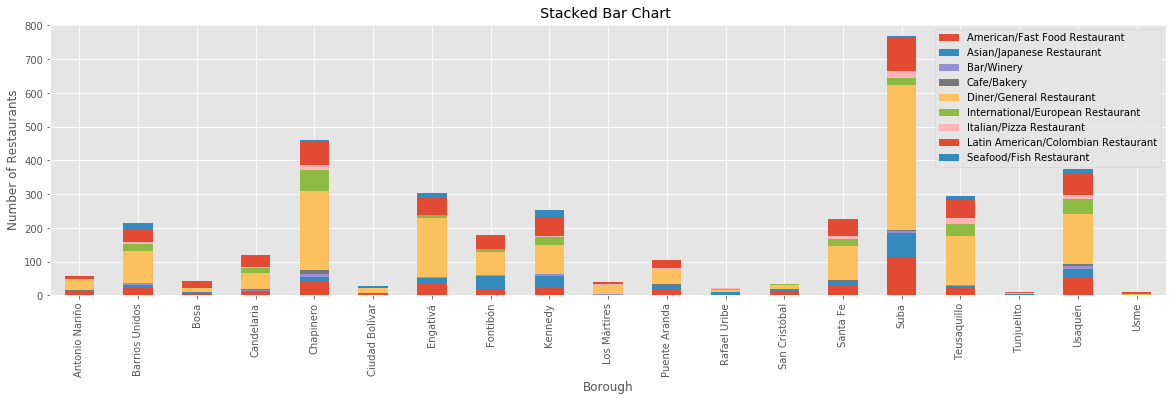

In [34]:
#Plot Bar Chart
# Import matplotlib
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # optional: for ggplot-like style
# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0


bogota_restaurants_borough.plot(kind='bar', stacked=True, figsize=(20, 5))
plt.title('Stacked Bar Chart ') # add a title to the histogram
plt.ylabel('Number of Restaurants') # add y-label
plt.xlabel('Borough') # add x-label
plt.show()


## Neighborhood Clustering
Neighborhoods were clustered based on a normalized value of the total amount of restaurants, and the amount of restaurants per category

In [65]:
bogota_restaurants_cluster=bogota_restaurants_new_cat.copy(deep=True)
# Drop non-clustering variables
bogota_restaurants_cluster.drop(['Neighborhood_ID', 'Borough', 'Neighborhood', 'Latitude', 'Longitude'], axis = 1, inplace=True)

bogota_restaurants_cluster.drop([1171], inplace = True)
bogota_restaurants_cluster.tail()

Total Restaurants  American/Fast Food Restaurant  \
1166                1.0                            0.0   
1167                3.0                            0.0   
1168                2.0                            0.0   
1169                1.0                            0.0   
1170                2.0                            1.0   

      Asian/Japanese Restaurant  Bar/Winery  Cafe/Bakery  \
1166                        0.0         0.0          0.0   
1167                        0.0         0.0          0.0   
1168                        0.0         0.0          0.0   
1169                        0.0         0.0          0.0   
1170                        0.0         0.0          0.0   

      Diner/General Restaurant  International/European Restaurant  \
1166                       0.0                                0.0   
1167                       1.0                                0.0   
1168                       1.0                                0.0   
1169                       0.0                                1.0   
1170                       1.0                                0.0   

      Italian/Pizza Restaurant  Latin American/Colombian Restaurant  \
1166                       0.0                                  1.0   
1167                       0.0                                  2.0   
1168                       0.0                                  0.0   
1169                       0.0                                  0.0   
1170                       0.0                                  0.0   

      Seafood/Fish Restaurant  
1166                      0.0  
1167                      0.0  
1168                      1.0  
1169                      0.0  
1170                      0.0

### Create Cluster

In [91]:
# Run k-means to cluster the Postcode into 4 clusters.
# set number of clusters
kclusters = 5
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bogota_restaurants_cluster)
kmeans.labels_[0:10]


array([0, 2, 2, 2, 2, 1, 3, 0, 2, 2], dtype=int32)

In [92]:
bogota_restaurants_cat_cluster=bogota_restaurants_new_cat.copy(deep=True)
bogota_restaurants_cat_cluster.drop([1171], inplace=True)
bogota_restaurants_cat_cluster.insert(0, 'Cluster Labels', kmeans.labels_)
bogota_restaurants_cat_cluster.tail()

Cluster Labels  Neighborhood_ID         Borough  \
1166               2           3859.0  Antonio Nariño   
1167               0           3860.0  Antonio Nariño   
1168               2           3862.0        Fontibón   
1169               2           3864.0         Usaquén   
1170               2           3865.0            Suba   

                     Neighborhood Latitude Longitude  Total Restaurants  \
1166  San Jorge Central II Sector   4.5932  -74.1167                1.0   
1167            San Jorge_Central  4.59425  -74.1146                3.0   
1168          La Cabaña - El Rubí  4.67608  -74.1388                2.0   
1169            Cabañas del Norte  4.73584  -74.0307                1.0   
1170         Prados de la Campiña  4.74188  -74.0887                2.0   

      American/Fast Food Restaurant  Asian/Japanese Restaurant  Bar/Winery  \
1166                            0.0                        0.0         0.0   
1167                            0.0                        0.0         0.0   
1168                            0.0                        0.0         0.0   
1169                            0.0                        0.0         0.0   
1170                            1.0                        0.0         0.0   

      Cafe/Bakery  Diner/General Restaurant  \
1166          0.0                       0.0   
1167          0.0                       1.0   
1168          0.0                       1.0   
1169          0.0                       0.0   
1170          0.0                       1.0   

      International/European Restaurant  Italian/Pizza Restaurant  \
1166                                0.0                       0.0   
1167                                0.0                       0.0   
1168                                0.0                       0.0   
1169                                1.0                       0.0   
1170                                0.0                       0.0   

      Latin American/Colombian Restaurant  Seafood/Fish Restaurant  
1166                                  1.0                      0.0  
1167                                  2.0                      0.0  
1168                                  0.0                      1.0  
1169                                  0.0                      0.0  
1170                                  0.0                      0.0

In [93]:
bogota_restaurants_cluster_group=bogota_restaurants_cat_cluster.groupby('Cluster Labels').sum()
bogota_restaurants_cluster_groupc=bogota_restaurants_cat_cluster.groupby('Cluster Labels').count()
bogota_restaurants_cluster_group['Neighborhood_ID']=bogota_restaurants_cluster_groupc['Neighborhood_ID']
bogota_restaurants_cluster_group['American/Fast Food Restaurant']=bogota_restaurants_cluster_group['American/Fast Food Restaurant']/bogota_restaurants_cluster_group['Total Restaurants']
bogota_restaurants_cluster_group['Asian/Japanese Restaurant']=bogota_restaurants_cluster_group['Asian/Japanese Restaurant']/bogota_restaurants_cluster_group['Total Restaurants']
bogota_restaurants_cluster_group['Bar/Winery']=bogota_restaurants_cluster_group['Bar/Winery']/bogota_restaurants_cluster_group['Total Restaurants']
bogota_restaurants_cluster_group['Cafe/Bakery']=bogota_restaurants_cluster_group['Cafe/Bakery']/bogota_restaurants_cluster_group['Total Restaurants']
bogota_restaurants_cluster_group['Diner/General Restaurant']=bogota_restaurants_cluster_group['Diner/General Restaurant']/bogota_restaurants_cluster_group['Total Restaurants']
bogota_restaurants_cluster_group['International/European Restaurant']=bogota_restaurants_cluster_group['International/European Restaurant']/bogota_restaurants_cluster_group['Total Restaurants']
bogota_restaurants_cluster_group['Italian/Pizza Restaurant']=bogota_restaurants_cluster_group['Italian/Pizza Restaurant']/bogota_restaurants_cluster_group['Total Restaurants']
bogota_restaurants_cluster_group['Latin American/Colombian Restaurant']=bogota_restaurants_cluster_group['Latin American/Colombian Restaurant']/bogota_restaurants_cluster_group['Total Restaurants']
bogota_restaurants_cluster_group['Seafood/Fish Restaurant']=bogota_restaurants_cluster_group['Seafood/Fish Restaurant']/bogota_restaurants_cluster_group['Total Restaurants']
bogota_restaurants_cluster_group['Avg. Restaurants per Neighborhood']=bogota_restaurants_cluster_group['Total Restaurants']/bogota_restaurants_cluster_group['Neighborhood_ID']
bogota_restaurants_cluster_group

Neighborhood_ID  Total Restaurants  \
Cluster Labels                                       
0                           315             1273.0   
1                            22              497.0   
2                           764             1021.0   
3                            69              697.0   
4                             1               49.0   

                American/Fast Food Restaurant  Asian/Japanese Restaurant  \
Cluster Labels                                                             
0                                    0.120974                   0.088767   
1                                    0.088531                   0.028169   
2                                    0.162586                   0.099902   
3                                    0.083214                   0.044476   
4                                    0.142857                   0.020408   

                Bar/Winery  Cafe/Bakery  Diner/General Restaurant  \
Cluster Labels                                                      
0                 0.013354     0.007855                  0.527101   
1                 0.020121     0.022133                  0.466801   
2                 0.013712     0.003918                  0.424094   
3                 0.008608     0.018651                  0.467719   
4                 0.020408     0.040816                  0.387755   

                International/European Restaurant  Italian/Pizza Restaurant  \
Cluster Labels                                                                
0                                        0.050275                  0.021995   
1                                        0.122736                  0.042254   
2                                        0.061704                  0.015671   
3                                        0.110473                  0.035868   
4                                        0.061224                  0.020408   

                Latin American/Colombian Restaurant  Seafood/Fish Restaurant  \
Cluster Labels                                                                 
0                                          0.145326                 0.024352   
1                                          0.193159                 0.016097   
2                                          0.172380                 0.046033   
3                                          0.212339                 0.018651   
4                                          0.285714                 0.020408   

                Avg. Restaurants per Neighborhood  
Cluster Labels                                     
0                                        4.041270  
1                                       22.590909  
2                                        1.336387  
3                                       10.101449  
4                                       49.000000

#### Second Clustering
The first clustering resulted in one of the clusters with only one neighborhood. Therefore a second clustering is run with 4 clusters

In [94]:
# Run k-means to cluster the Postcode into 4 clusters.
# set number of clusters
kclusters = 4
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bogota_restaurants_cluster)
kmeans.labels_[0:10]

array([0, 2, 2, 2, 2, 1, 3, 0, 2, 2], dtype=int32)

In [95]:
bogota_restaurants_cat_cluster=bogota_restaurants_new_cat.copy(deep=True)
bogota_restaurants_cat_cluster.drop([1171], inplace=True)
bogota_restaurants_cat_cluster.insert(0, 'Cluster Labels', kmeans.labels_)
bogota_restaurants_cat_cluster['Total Restaurants %']=bogota_restaurants_cluster['Total Restaurants']/3537
bogota_restaurants_cat_cluster.tail()

Cluster Labels  Neighborhood_ID         Borough  \
1166               2           3859.0  Antonio Nariño   
1167               0           3860.0  Antonio Nariño   
1168               2           3862.0        Fontibón   
1169               2           3864.0         Usaquén   
1170               2           3865.0            Suba   

                     Neighborhood Latitude Longitude  Total Restaurants  \
1166  San Jorge Central II Sector   4.5932  -74.1167                1.0   
1167            San Jorge_Central  4.59425  -74.1146                3.0   
1168          La Cabaña - El Rubí  4.67608  -74.1388                2.0   
1169            Cabañas del Norte  4.73584  -74.0307                1.0   
1170         Prados de la Campiña  4.74188  -74.0887                2.0   

      American/Fast Food Restaurant  Asian/Japanese Restaurant  Bar/Winery  \
1166                            0.0                        0.0         0.0   
1167                            0.0                        0.0         0.0   
1168                            0.0                        0.0         0.0   
1169                            0.0                        0.0         0.0   
1170                            1.0                        0.0         0.0   

      Cafe/Bakery  Diner/General Restaurant  \
1166          0.0                       0.0   
1167          0.0                       1.0   
1168          0.0                       1.0   
1169          0.0                       0.0   
1170          0.0                       1.0   

      International/European Restaurant  Italian/Pizza Restaurant  \
1166                                0.0                       0.0   
1167                                0.0                       0.0   
1168                                0.0                       0.0   
1169                                1.0                       0.0   
1170                                0.0                       0.0   

      Latin American/Colombian Restaurant  Seafood/Fish Restaurant  \
1166                                  1.0                      0.0   
1167                                  2.0                      0.0   
1168                                  0.0                      1.0   
1169                                  0.0                      0.0   
1170                                  0.0                      0.0   

      Total Restaurants %  
1166             0.000283  
1167             0.000848  
1168             0.000565  
1169             0.000283  
1170             0.000565

In [96]:
bogota_restaurants_cluster_group=bogota_restaurants_cat_cluster.groupby('Cluster Labels').sum()
bogota_restaurants_cluster_groupc=bogota_restaurants_cat_cluster.groupby('Cluster Labels').count()
bogota_restaurants_cluster_group['Neighborhood_ID']=bogota_restaurants_cluster_groupc['Neighborhood_ID']
bogota_restaurants_cluster_group['American/Fast Food Restaurant']=bogota_restaurants_cluster_group['American/Fast Food Restaurant']/bogota_restaurants_cluster_group['Total Restaurants']
bogota_restaurants_cluster_group['Asian/Japanese Restaurant']=bogota_restaurants_cluster_group['Asian/Japanese Restaurant']/bogota_restaurants_cluster_group['Total Restaurants']
bogota_restaurants_cluster_group['Bar/Winery']=bogota_restaurants_cluster_group['Bar/Winery']/bogota_restaurants_cluster_group['Total Restaurants']
bogota_restaurants_cluster_group['Cafe/Bakery']=bogota_restaurants_cluster_group['Cafe/Bakery']/bogota_restaurants_cluster_group['Total Restaurants']
bogota_restaurants_cluster_group['Diner/General Restaurant']=bogota_restaurants_cluster_group['Diner/General Restaurant']/bogota_restaurants_cluster_group['Total Restaurants']
bogota_restaurants_cluster_group['International/European Restaurant']=bogota_restaurants_cluster_group['International/European Restaurant']/bogota_restaurants_cluster_group['Total Restaurants']
bogota_restaurants_cluster_group['Italian/Pizza Restaurant']=bogota_restaurants_cluster_group['Italian/Pizza Restaurant']/bogota_restaurants_cluster_group['Total Restaurants']
bogota_restaurants_cluster_group['Latin American/Colombian Restaurant']=bogota_restaurants_cluster_group['Latin American/Colombian Restaurant']/bogota_restaurants_cluster_group['Total Restaurants']
bogota_restaurants_cluster_group['Seafood/Fish Restaurant']=bogota_restaurants_cluster_group['Seafood/Fish Restaurant']/bogota_restaurants_cluster_group['Total Restaurants']
bogota_restaurants_cluster_group['Avg. Restaurants per Neighborhood']=bogota_restaurants_cluster_group['Total Restaurants']/bogota_restaurants_cluster_group['Neighborhood_ID']
bogota_restaurants_cluster_group

Neighborhood_ID  Total Restaurants  \
Cluster Labels                                       
0                           317             1288.0   
1                            19              477.0   
2                           764             1021.0   
3                            71              751.0   

                American/Fast Food Restaurant  Asian/Japanese Restaurant  \
Cluster Labels                                                             
0                                    0.121118                   0.087733   
1                                    0.094340                   0.029350   
2                                    0.162586                   0.099902   
3                                    0.082557                   0.042610   

                Bar/Winery  Cafe/Bakery  Diner/General Restaurant  \
Cluster Labels                                                      
0                 0.013199     0.007764                  0.525621   
1                 0.014675     0.027254                  0.467505   
2                 0.013712     0.003918                  0.424094   
3                 0.013316     0.017310                  0.463382   

                International/European Restaurant  Italian/Pizza Restaurant  \
Cluster Labels                                                                
0                                        0.051242                  0.022516   
1                                        0.121593                  0.037736   
2                                        0.061704                  0.015671   
3                                        0.107856                  0.037284   

                Latin American/Colombian Restaurant  Seafood/Fish Restaurant  \
Cluster Labels                                                                 
0                                          0.144410                 0.026398   
1                                          0.192872                 0.014675   
2                                          0.172380                 0.046033   
3                                          0.219707                 0.015979   

                Total Restaurants %  Avg. Restaurants per Neighborhood  
Cluster Labels                                                          
0                          0.364150                           4.063091  
1                          0.134860                          25.105263  
2                          0.288663                           1.336387  
3                          0.212327                          10.577465

### Cluster Typification and Naming

#### Cluster 0: Neighborhoods with low density restaurant offering and mostly general restaurants without any specialization
Cluster 0 is characterized for having relatively low restaurant offering and mostly diners or general restaurants without any specialization. They have the highest percentage of Diner/General Restaurant and the lowest for Latin American/Colombian. This is probably the group that would be the least interesting for a Foodie Tour

#### Cluster 1: Neighborhoods with the highest density restaurant, mainstream places for the restaurant scene in Bogota
Cluster 1 has the highest density with more than 25 restaurants in average and the higest offering of International/European cuisine and Cafes/Bakeries compared to other clusters. It also has good offering of Latin American and Colombian cuisine and Italian restaurants. This is probably the most interesting group for a Foodie tour, it is composed by 19 neighborhhods with a very interesting offering.

This cluster includes 19 neighborhoods including the most famous and traditional in Bogota restaurant scene such as La Candelaria, Macarena, Usaquen, Virrey, Parque 93 or Quinta Camacho

The following table shows the 10 neighborhoods with the highest amount of restaurants in this group.

In [104]:
bogota_restaurants_cat_cluster[bogota_restaurants_cat_cluster['Cluster Labels']==1].sort_values(by=['Total Restaurants'], ascending=False).head(10)

Cluster Labels  Neighborhood_ID     Borough            Neighborhood  \
62                1            207.0  Candelaria             La Catedral   
961               1           3269.0    Santa Fe              Veracruz__   
959               1           3267.0    Santa Fe              San_Martín   
707               1           2520.0     Usaquén        Urb. El Cebadero   
785               1           2710.0   Chapinero  S.C. Chapinero Central   
176               1            657.0     Usaquén                 Usaquén   
724               1           2545.0   Chapinero     S.C. Quinta Camacho   
953               1           3260.0    Santa Fe               San Diego   
729               1           2551.0   Chapinero        S.C. Lago Gaitan   
958               1           3266.0    Santa Fe             La Macarena   

    Latitude Longitude  Total Restaurants  American/Fast Food Restaurant  \
62   4.59954  -74.0736               49.0                            7.0   
961  4.60325  -74.0723               31.0                            1.0   
959  4.61699  -74.0674               30.0                            7.0   
707  4.69511  -74.0333               27.0                            2.0   
785  4.64465  -74.0635               27.0                            1.0   
176  4.69474  -74.0307               26.0                            2.0   
724  4.65479  -74.0596               26.0                            4.0   
953  4.61366  -74.0697               26.0                            3.0   
729  4.66607  -74.0588               25.0                            1.0   
958  4.61425  -74.0654               23.0                            2.0   

     Asian/Japanese Restaurant  Bar/Winery  Cafe/Bakery  \
62                         1.0         1.0          2.0   
961                        3.0         0.0          3.0   
959                        1.0         0.0          0.0   
707                        0.0         0.0          0.0   
785                        3.0         0.0          1.0   
176                        0.0         1.0          0.0   
724                        1.0         1.0          1.0   
953                        1.0         0.0          1.0   
729                        0.0         1.0          1.0   
958                        0.0         0.0          1.0   

     Diner/General Restaurant  International/European Restaurant  \
62                       19.0                                3.0   
961                      17.0                                2.0   
959                      10.0                                4.0   
707                      12.0                                3.0   
785                      16.0                                1.0   
176                      10.0                                4.0   
724                      12.0                                2.0   
953                      12.0                                2.0   
729                      13.0                                5.0   
958                       5.0                                7.0   

     Italian/Pizza Restaurant  Latin American/Colombian Restaurant  \
62                        1.0                                 14.0   
961                       0.0                                  4.0   
959                       0.0                                  8.0   
707                       2.0                                  8.0   
785                       1.0                                  4.0   
176                       1.0                                  8.0   
724                       1.0                                  4.0   
953                       3.0                                  4.0   
729                       0.0                                  3.0   
958                       3.0                                  5.0   

     Seafood/Fish Restaurant  Total Restaurants %  
62                       1.0             0.013854  
961                      1.0             0.008764  
959  

#### Cluster 2: Neighborhoods with the lowest density restaurant offering with high percentage of fast food restaurants
Cluster 2 is the biggest one of all, with 764 neighborhoods. I has very low density with only 1.3 restaurants per neighborhood in average. I has the highest percentage of fast food restaurant and seafood restaurants. Interestingly enough it also has a high percentage of Asian restaurants compared to the other clusters.

Just like cluster 0, this cluster is probably not interesting for a Foodie tour, it is likely that most of the restaurants are simple places where locals have lunch regularely

#### Cluster 3: Neighborhoods with high density restaurant offering and alternative offering to the traditional famous
Cluster 3 include 71 neighborhoods with an average of 10 restaurants per neighborhood. Although the offer is not as dense as in cluster 1, it could be a very interesting alternative to the mainstream, traditional offering from Bogota. It includes a high percentage of Latin American and Colombian restaurants and is the second one with the highest offering of International/European cuisine. 

This group includes very interesting neighborhoods such as Teusaquillo, Chapinero, Pasadena or La Capuchina that are worth exploring to taste alternative and authentic cuisine that is probably not in the regular Tour guides.

The following table shows the 10 neighborhoods with the highest amount of restaurants in this group.

In [106]:
bogota_restaurants_cat_cluster[bogota_restaurants_cat_cluster['Cluster Labels']==3].sort_values(by=['Total Restaurants'], ascending=False).head(10)
                                                                                                                                            

Cluster Labels  Neighborhood_ID      Borough  \
787               3           2712.0    Chapinero   
730               3           2552.0    Chapinero   
727               3           2549.0    Chapinero   
892               3           3093.0      Usaquén   
726               3           2548.0    Chapinero   
732               3           2554.0    Chapinero   
259               3            875.0  Teusaquillo   
852               3           2972.0    Chapinero   
951               3           3256.0    Chapinero   
770               3           2674.0    Chapinero   

                               Neighborhood Latitude Longitude  \
787                              S.C. Sucre  4.62963  -74.0664   
730                El Retiro - Villa Andina  4.66663  -74.0531   
727                         Chico Reservado  4.67914  -74.0426   
892          Usaquén - Urb. Portal de Siena  4.69345  -74.0295   
726  Chico Norte - Urb. Conjunto de la Cien  4.68049  -74.0414   
732                        S.C. Porciúncula  4.65943  -74.0578   
259                             Teusaquillo  4.62309  -74.0723   
852                            S.C. Granada  4.64941  -74.0563   
951                           S.C. La Salle  4.64474   -74.059   
770                    S.C. Antiguo Country  4.67168  -74.0573   

     Total Restaurants  American/Fast Food Restaurant  \
787               18.0                            4.0   
730               17.0                            2.0   
727               17.0                            0.0   
892               17.0                            0.0   
726               15.0                            1.0   
732               15.0                            4.0   
259               15.0                            2.0   
852               14.0                            2.0   
951               13.0                            0.0   
770               13.0                            2.0   

     Asian/Japanese Restaurant  Bar/Winery  Cafe/Bakery  \
787                        1.0         1.0          0.0   
730                        0.0         2.0          0.0   
727                        0.0         0.0          0.0   
892                        0.0         1.0          0.0   
726                        0.0         0.0          0.0   
732                        0.0         0.0          0.0   
259                        0.0         1.0          0.0   
852                        1.0         0.0          0.0   
951                        3.0         0.0          1.0   
770                        0.0         1.0          2.0   

     Diner/General Restaurant  International/European Restaurant  \
787                       4.0                                1.0   
730                       7.0                                0.0   
727                       9.0                                1.0   
892                       8.0                                4.0   
726                       8.0                                1.0   
732                       8.0                                0.0   
259                       6.0                                3.0   
852                       5.0                                5.0   
951                       7.0                                1.0   
770                       5.0                                0.0   

     Italian/Pizza Restaurant  Latin American/Colombian Restaurant  \
787                       1.0                                  5.0   
730                       1.0                                  4.0   
727                       1.0                                  6.0   
892                       1.0                                  3.0   
726                       1.0                                  4.0   
732                       0.0                                  3.0   
259                       1.0                                  2.0   
852                       0.0                                  1.0   
951                       1.0        

## Cluster map from Bogota
The final step is to present the map with the cluster and the radius 

Cluster 0: Red
Cluster 1: Purple
Cluster 2: Green
Cluster 3: Yellow

In [109]:
# Add radius

bogota_restaurants_map_cluster=bogota_restaurants_cat_cluster.copy(deep=True)
bogota_restaurants_map_cluster['Radius Size'] = np.log2(bogota_restaurants_map['Total Restaurants']+1)*5
bogota_restaurants_map_cluster.tail()

Cluster Labels  Neighborhood_ID         Borough  \
1166               2           3859.0  Antonio Nariño   
1167               0           3860.0  Antonio Nariño   
1168               2           3862.0        Fontibón   
1169               2           3864.0         Usaquén   
1170               2           3865.0            Suba   

                     Neighborhood Latitude Longitude  Total Restaurants  \
1166  San Jorge Central II Sector   4.5932  -74.1167                1.0   
1167            San Jorge_Central  4.59425  -74.1146                3.0   
1168          La Cabaña - El Rubí  4.67608  -74.1388                2.0   
1169            Cabañas del Norte  4.73584  -74.0307                1.0   
1170         Prados de la Campiña  4.74188  -74.0887                2.0   

      American/Fast Food Restaurant  Asian/Japanese Restaurant  Bar/Winery  \
1166                            0.0                        0.0         0.0   
1167                            0.0                        0.0         0.0   
1168                            0.0                        0.0         0.0   
1169                            0.0                        0.0         0.0   
1170                            1.0                        0.0         0.0   

      Cafe/Bakery  Diner/General Restaurant  \
1166          0.0                       0.0   
1167          0.0                       1.0   
1168          0.0                       1.0   
1169          0.0                       0.0   
1170          0.0                       1.0   

      International/European Restaurant  Italian/Pizza Restaurant  \
1166                                0.0                       0.0   
1167                                0.0                       0.0   
1168                                0.0                       0.0   
1169                                1.0                       0.0   
1170                                0.0                       0.0   

      Latin American/Colombian Restaurant  Seafood/Fish Restaurant  \
1166                                  1.0                      0.0   
1167                                  2.0                      0.0   
1168                                  0.0                      1.0   
1169                                  0.0                      0.0   
1170                                  0.0                      0.0   

      Total Restaurants %  Radius Size  
1166             0.000283     5.000000  
1167             0.000848    10.000000  
1168             0.000565     7.924813  
1169             0.000283     5.000000  
1170             0.000565     7.924813

In [113]:

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, radius in zip(bogota_restaurants_map_cluster['Latitude'], bogota_restaurants_map_cluster['Longitude'], bogota_restaurants_map_cluster['Neighborhood'], bogota_restaurants_map_cluster['Cluster Labels'], bogota_restaurants_map_cluster['Radius Size']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

In [114]:
bogota_restaurants_map_cluster.tail()

Cluster Labels  Neighborhood_ID         Borough  \
1166               2           3859.0  Antonio Nariño   
1167               0           3860.0  Antonio Nariño   
1168               2           3862.0        Fontibón   
1169               2           3864.0         Usaquén   
1170               2           3865.0            Suba   

                     Neighborhood Latitude Longitude  Total Restaurants  \
1166  San Jorge Central II Sector   4.5932  -74.1167                1.0   
1167            San Jorge_Central  4.59425  -74.1146                3.0   
1168          La Cabaña - El Rubí  4.67608  -74.1388                2.0   
1169            Cabañas del Norte  4.73584  -74.0307                1.0   
1170         Prados de la Campiña  4.74188  -74.0887                2.0   

      American/Fast Food Restaurant  Asian/Japanese Restaurant  Bar/Winery  \
1166                            0.0                        0.0         0.0   
1167                            0.0                        0.0         0.0   
1168                            0.0                        0.0         0.0   
1169                            0.0                        0.0         0.0   
1170                            1.0                        0.0         0.0   

      Cafe/Bakery  Diner/General Restaurant  \
1166          0.0                       0.0   
1167          0.0                       1.0   
1168          0.0                       1.0   
1169          0.0                       0.0   
1170          0.0                       1.0   

      International/European Restaurant  Italian/Pizza Restaurant  \
1166                                0.0                       0.0   
1167                                0.0                       0.0   
1168                                0.0                       0.0   
1169                                1.0                       0.0   
1170                                0.0                       0.0   

      Latin American/Colombian Restaurant  Seafood/Fish Restaurant  \
1166                                  1.0                      0.0   
1167                                  2.0                      0.0   
1168                                  0.0                      1.0   
1169                                  0.0                      0.0   
1170                                  0.0                      0.0   

      Total Restaurants %  Radius Size  
1166             0.000283     5.000000  
1167             0.000848    10.000000  
1168             0.000565     7.924813  
1169             0.000283     5.000000  
1170             0.000565     7.924813